<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
- Recieves input from the dataset. The 'first' or leftmost layer in a neural network. Typically node maps are drawn with one input for each of the different inputs/features/columns in a dataset.

### Hidden Layer: 
- Refers to all the layers between the input and output layers. "Deep learning" effectively refers to using a neural network that has muliple hidden layers.

### Output Layer: 
- The final ('rightmost') layer. Typically the output layer outputs a vector of values in a format suitable for the type of problem to be addressed. Often the output value is modified by an 'activation function' to transform it into a format that makes sense for a given context. 

### Neuron: 
- A neuron (aka. a node) takes all the inputs, performs some action (typically using the weights) and then applies an activation function (typically the function is used within one layer) and produces an output. 

### Weight: 
- Weights are the coefficients that inputs are multiplied by within a neuron. Optimal weights can be found through gradient descent if there is a loss function that evaluates the quality of our predictions compared to the targets in the training data. 

### Activation Function: 
- Activation functions decide how much signal is passed onto the next layer (how on or off the node is). Each node in a given layer typically has the same activation function. Activation functions are sometimes referred to as transfer functions because they determine how much signal is transferred to the next layer. 

### Node Map: 
- A node map is a simple diagram which visually explains how a node within a neural network is computed. Node maps typically show the input, hidden, output layers, and the connections between each layer.

### Perceptron: 
- A percepron is a single node or neuron of a neural network. A perceptron takes any number of inputs and produces an output. Essentially a neuron takes each input values, multiplies it by a weight, sums all the products, and passes the sum through an activation function which produces the final value. 


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

The basic flow of a neural network is as follows:
- Inputs are passed to the input layers.
- The first hidden layer accepts the inputs, applies weights, some calculation, and applies an activation function. The hidden layer than produces an output that is passed onto the next layer (typically). 
- Bias, essentially an additional scaling factor, is applied to a single hidden layer. In a typical neural network bias will then impact all layers that follow the modified hidden layer. 
- The output is the result of the right-most layer. Typically the activation function transforms the output layer into a format that makes sense for a given context. 


## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [2]:
import numpy as np

In [25]:
inputs = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1],
    [1,1,1]
])

correct_outputs = [[1], [1], [1], [0]]

In [26]:
# Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

In [27]:
weights = 2 * np.random.random((3, 1)) - 1

for iteration in range(10000):
    weighted_sum = np.dot(inputs, weights)
    
    activated_output = sigmoid(weighted_sum)
    
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Outputs after training")
print(activated_output)

Weights after training
[[-11.839338  ]
 [-11.839338  ]
 [ 17.80787176]]
Outputs after training
[[0.99999998]
 [0.99744828]
 [0.99744828]
 [0.00281295]]


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.isnull().sum().sum()

0

In [33]:
df.shape

(768, 9)

In [35]:
y = df['Outcome'].values

In [37]:
X = df.drop(columns='Outcome').values

In [40]:
class Perceptron(object):
    def __init__(self, rate=0.01, niter=10000):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        self.weight = np.zeros(1 + X.shape[1])
        
        self.errors = []
        
        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [42]:
pn = Perceptron(0.1, 10000)
pn.fit(X, y)

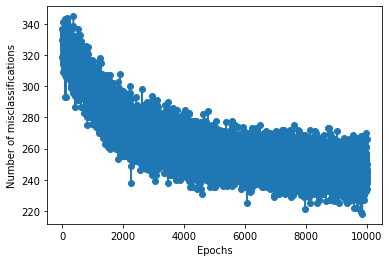

In [44]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [46]:
preds = pn.predict(X)

In [48]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score: {accuracy_score(y, preds)}')

Accuracy Score: 0.7317708333333334


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?